In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [3]:
back_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\sales-of-shampoo-over-a-three-ye.csv', index_col=0) 
back_df.index = pd.DatetimeIndex(back_df.index)
back_df.index = pd.to_datetime(back_df.index, errors='coerce')

back_df

,Sales of shampoo over a three year period
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3
2001-06-01,168.5
2001-07-01,231.8
2001-08-01,224.5
2001-09-01,192.8


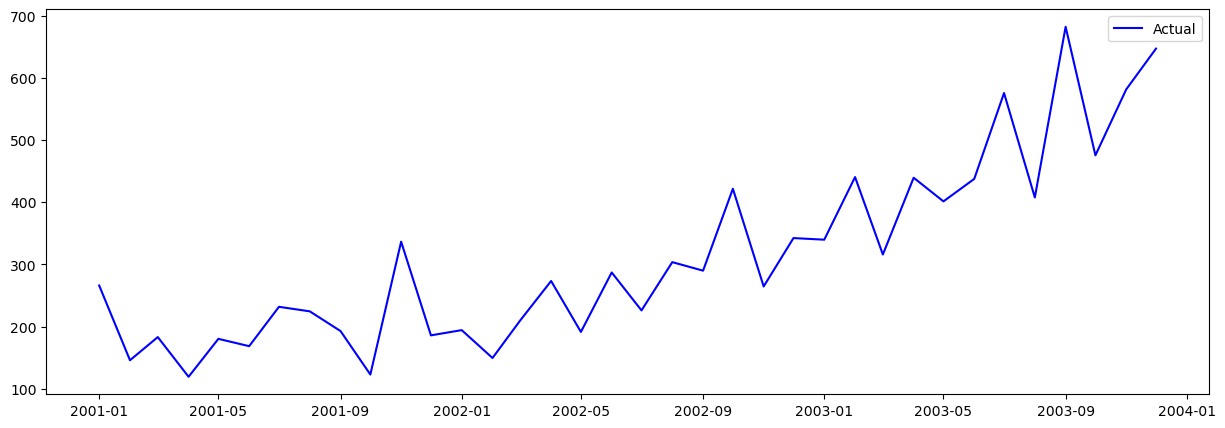

In [4]:
plt.figure(figsize=(15,5))
plt.plot(back_df.index, back_df['Sales of shampoo over a three year period'], color='blue', label='Actual') 
plt.legend()
plt.show()

ARIMA

In [5]:
y=back_df['Sales of shampoo over a three year period']

In [6]:
y_train = y[:-6]
y_test = y[-6:]
y_train.shape, y_test.shape

((30,), (6,))

In [7]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='MS',  
)

model_fit = model.fit()

RMSE:  188.37408912549563
RMSE: 188.37


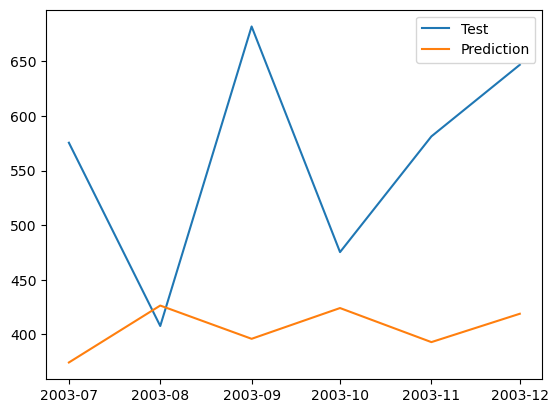

In [8]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

y_pred.index = y_test.index
print(f'RMSE: {error:.2f}')

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

SARIMA

In [9]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='MS', 
    seasonal_order=(1,1,1,12)
)

model_fit = model.fit()

RMSE: 154.24


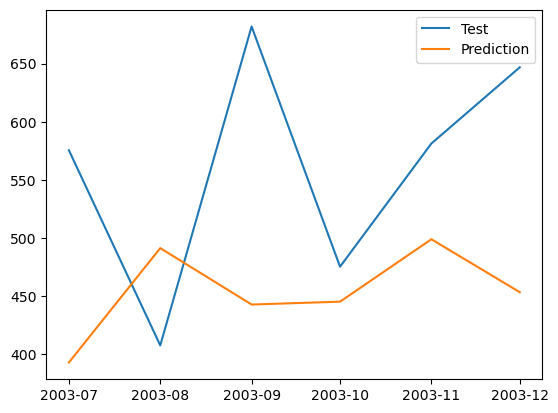

In [10]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)


print(f'RMSE: {error:.2f}') 
y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

Auto ARIMA

In [11]:
from pmdarima.arima import auto_arima

In [12]:
def arima_with_plot(model):
    
    y_pred = model.predict(n_periods=len(y_test))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index

    plt.figure(figsize=(15, 5))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=346.449, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=329.759, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.826, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=344.577, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.141, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=329.032, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=326.967, Time=0.20 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.338, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 2.117 seconds
RMSE:  142.0483793058798


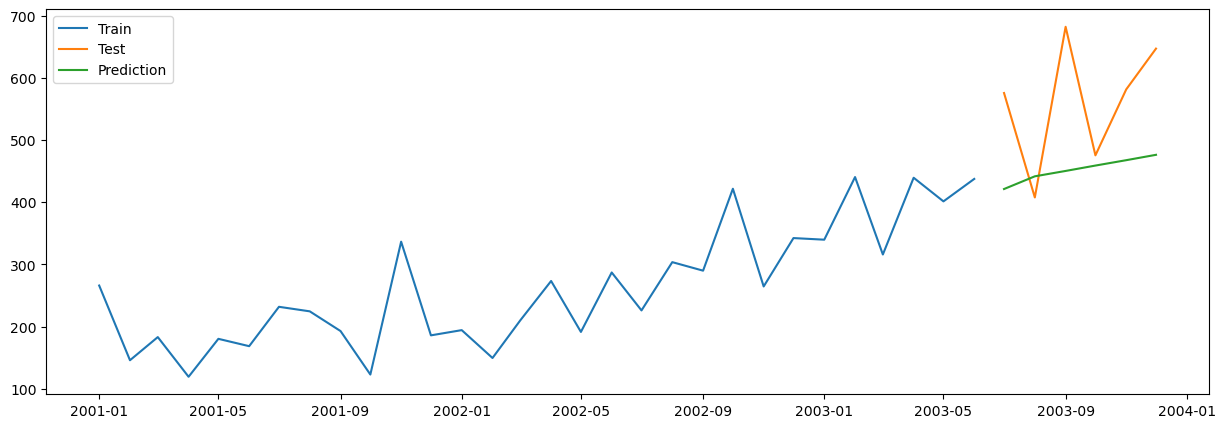

In [13]:
# Without seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=346.449, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=325.552, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=344.577, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=329.759, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.544, Time=0.71 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=327.542, Time=0.80 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=325.742, Time=0.37 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=344.139, Time=0.25 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=325.838, Time=0.47 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=322.439, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=327.141, Time=0.11 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=32

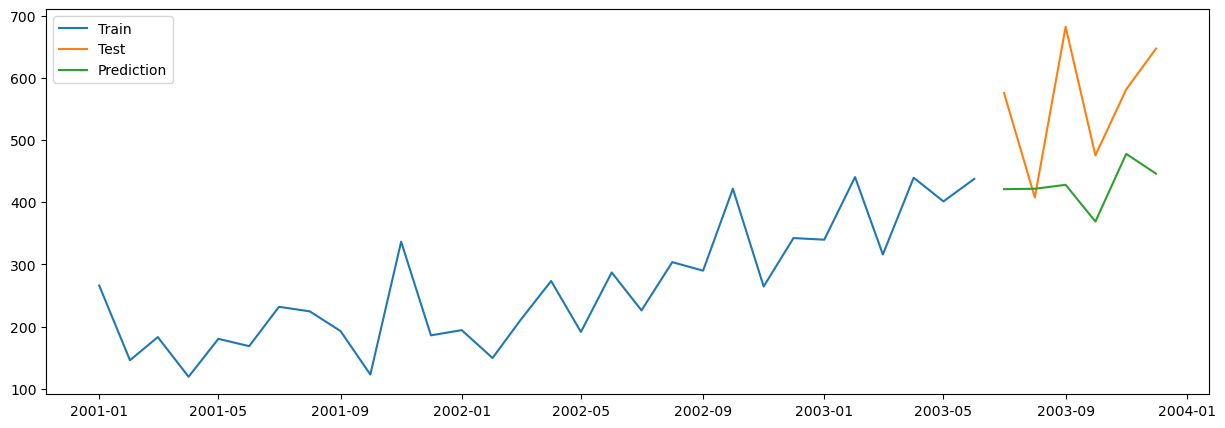

In [14]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)

Holt

RSME: 115.3760588470474


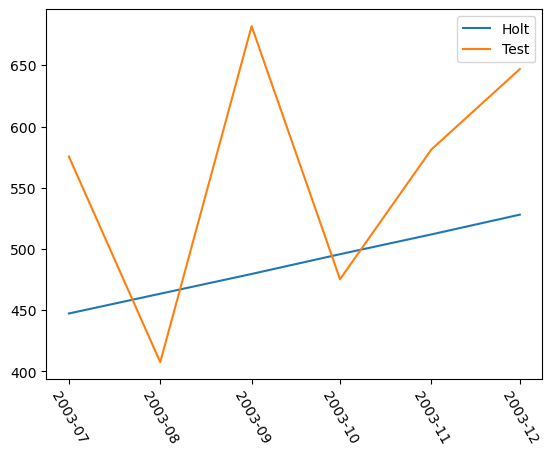

In [21]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing



damp_HW = Holt(y_train)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

Holt Winters with Damping

RSME: 128.1200204823139


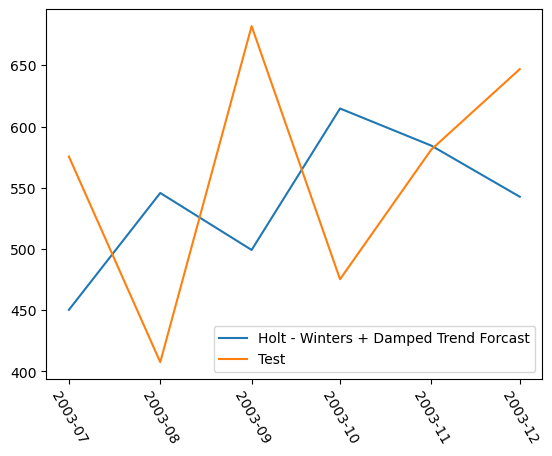

In [ ]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing


damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul',damped_trend=True)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

Holt Exponential with damped trend

RSME: 150.37476225051904


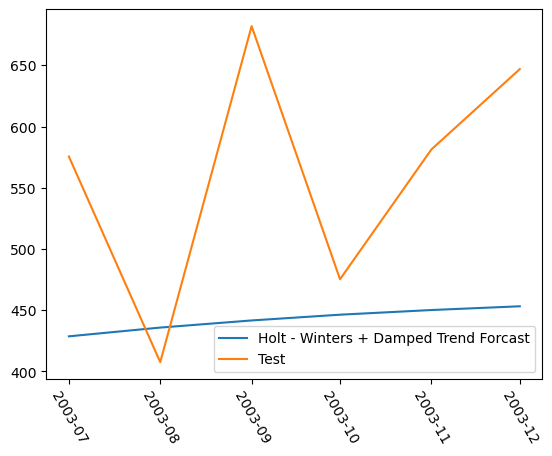

In [20]:
from math import exp, sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing



damp_HW = Holt(y_train, exponential=True, damped=True)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

RSME: 105.85014885121163


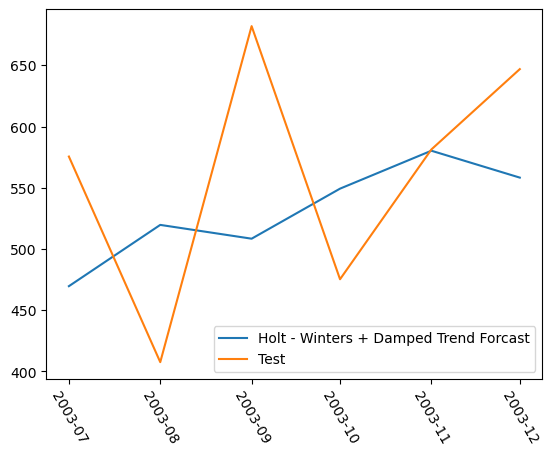

In [19]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing


alpha, beta, gamma = 0.2, 0.5, 0.2
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add',damped_trend=False)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()